In [1]:
#Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

642

In [2]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | wanning
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | sakaiminato
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | ouadda
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | atasu
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | pandan
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | ganzhou
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | hoi an
Processing Record 23 of Set 1 | opu

Processing Record 40 of Set 4 | naantali
Processing Record 41 of Set 4 | bilma
Processing Record 42 of Set 4 | jalu
Processing Record 43 of Set 4 | otane
Processing Record 44 of Set 4 | havelock
Processing Record 45 of Set 4 | papetoai
Processing Record 46 of Set 4 | auki
Processing Record 47 of Set 4 | avera
Processing Record 48 of Set 4 | jacqueville
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | adrian
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | lyuban
Processing Record 5 of Set 5 | port lincoln
Processing Record 6 of Set 5 | monte alegre
Processing Record 7 of Set 5 | kholm-zhirkovskiy
Processing Record 8 of Set 5 | kavaratti
Processing Record 9 of Set 5 | ancud
Processing Record 10 of Set 5 | tasiilaq
Processing Record 11 of Set 5 | basco
Processing Record 12 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 13 of Set 5 | ts

Processing Record 31 of Set 8 | lewistown
Processing Record 32 of Set 8 | bud
Processing Record 33 of Set 8 | sisimiut
Processing Record 34 of Set 8 | otjiwarongo
Processing Record 35 of Set 8 | hamadan
Processing Record 36 of Set 8 | bocaiuva
Processing Record 37 of Set 8 | sabang
Processing Record 38 of Set 8 | mandera
Processing Record 39 of Set 8 | quelimane
Processing Record 40 of Set 8 | georgetown
Processing Record 41 of Set 8 | moerai
Processing Record 42 of Set 8 | dunedin
Processing Record 43 of Set 8 | bealanana
Processing Record 44 of Set 8 | ye
City not found. Skipping...
Processing Record 45 of Set 8 | puerto del rosario
Processing Record 46 of Set 8 | bagdarin
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | zyryanovsk
Processing Record 49 of Set 8 | karratha
Processing Record 50 of Set 8 | bugasong
Processing Record 1 of Set 9 | nabire
Processing Record 2 of Set 9 | normandin
Processing Record 3 of Set 9 | buchanan
Processing Record 4 of Set 9 | t

Processing Record 18 of Set 12 | manama
Processing Record 19 of Set 12 | linqiong
Processing Record 20 of Set 12 | ahipara
Processing Record 21 of Set 12 | angoche
Processing Record 22 of Set 12 | panguna
Processing Record 23 of Set 12 | ambon
Processing Record 24 of Set 12 | san roque
Processing Record 25 of Set 12 | pontian kecil
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | kashi
Processing Record 28 of Set 12 | chagda
City not found. Skipping...
Processing Record 29 of Set 12 | hofn
Processing Record 30 of Set 12 | zhigansk
Processing Record 31 of Set 12 | kalmunai
Processing Record 32 of Set 12 | ikirun
Processing Record 33 of Set 12 | asau
Processing Record 34 of Set 12 | bam
Processing Record 35 of Set 12 | louis trichardt
Processing Record 36 of Set 12 | orlik
Processing Record 37 of Set 12 | bakchar
Processing Record 38 of Set 12 | zyryanka
Processing Record 39 of Set 12 | de-kastri
Processing Record 40 of Set 12 | maceio
Processing Record 41 of 

In [9]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,55.99,81,0,5.75,AR,2021-05-16 07:47:57
1,Bethel,41.3712,-73.4140,55.00,71,75,3.44,US,2021-05-16 07:47:58
2,Torbay,47.6666,-52.7314,39.99,100,90,14.97,CA,2021-05-16 07:47:58
3,Dikson,73.5069,80.5464,25.32,73,100,16.80,RU,2021-05-16 07:47:59
4,Wanning,18.8003,110.3967,89.37,63,26,13.51,CN,2021-05-16 07:47:59
5,Isangel,-19.5500,169.2667,77.54,79,8,3.78,VU,2021-05-16 07:48:00
6,Sakaiminato,35.5500,133.2333,80.60,73,75,12.66,JP,2021-05-16 07:48:00
7,Butaritari,3.0707,172.7902,82.96,79,100,16.64,KI,2021-05-16 07:47:46
8,Ouadda,8.0777,22.4007,81.70,62,86,4.97,CF,2021-05-16 07:48:01
9,Nikolskoye,59.7035,30.7861,61.00,82,40,6.71,RU,2021-05-16 07:48:01


In [10]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2021-05-16 07:47:57,-38.0023,-57.5575,55.99,81,0,5.75
1,Bethel,US,2021-05-16 07:47:58,41.3712,-73.4140,55.00,71,75,3.44
2,Torbay,CA,2021-05-16 07:47:58,47.6666,-52.7314,39.99,100,90,14.97
3,Dikson,RU,2021-05-16 07:47:59,73.5069,80.5464,25.32,73,100,16.80
4,Wanning,CN,2021-05-16 07:47:59,18.8003,110.3967,89.37,63,26,13.51
5,Isangel,VU,2021-05-16 07:48:00,-19.5500,169.2667,77.54,79,8,3.78
6,Sakaiminato,JP,2021-05-16 07:48:00,35.5500,133.2333,80.60,73,75,12.66
7,Butaritari,KI,2021-05-16 07:47:46,3.0707,172.7902,82.96,79,100,16.64
8,Ouadda,CF,2021-05-16 07:48:01,8.0777,22.4007,81.70,62,86,4.97
9,Nikolskoye,RU,2021-05-16 07:48:01,59.7035,30.7861,61.00,82,40,6.71


In [15]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

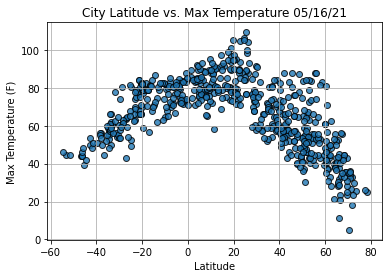

In [17]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot.
plt.show()

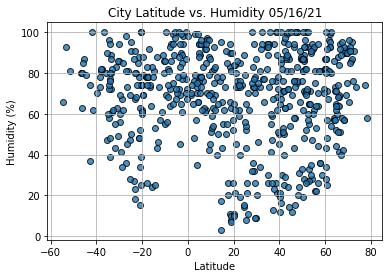

In [18]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

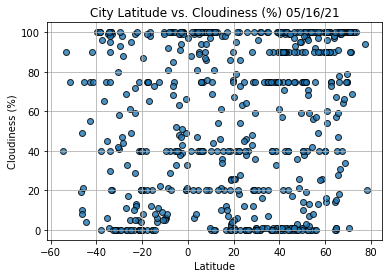

In [19]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

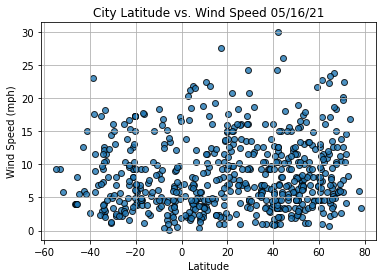

In [20]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()